In [578]:
import matplotlib
import sympy as sp
import numpy
import math
import homogenous as h

theta_1 = sp.Symbol('theta_1')
theta_2 = sp.Symbol('theta_2')
phi= sp.Symbol('phi_0')

length_a = sp.Symbol('l_0-1')
length_b = sp.Symbol('l_1-2')
length_c = sp.Symbol('l_2-e')
theta_1
sp.Matrix([phi,theta_1,theta_2,length_a,length_b,length_c])

Matrix([
[  phi_0],
[theta_1],
[theta_2],
[  l_0-1],
[  l_1-2],
[  l_2-e]])

3 R robot triangle(stled after 6dofPUMA)

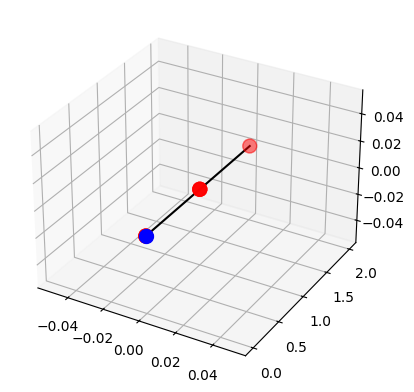

In [579]:
#robot start
import matplotlib.pyplot as plt

#robot links
#x, y, z = [1, 1.5, 2], [1, 2.4,4], [3.4, 1.4,5]
ln_0 = 1
ln_1 = 1
ln_2 = 1

x = [0,0,0,0]
y = [0,ln_0,ln_1,ln_1+ln_2]
z = [0,0,0,0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='red', s=100)
ax.scatter(x, y, z, c='red', s=100)

ax.scatter(x[0], y[0], z[0], c='blue', s=100)

ax.plot(x, y, z, color='black')
plt.show()

calculate fwd kinematics

In [580]:
#joint_0 = h.Rot_z(phi)*h.trans_y(length_a)
#joint_1 = joint_0 * h.Rot_x(theta_1)*h.trans_y(length_b)
#joint_2 = joint_1 *h.Rot_x*(theta_2) * h.trans_y(length_c)
fk_mat = h.Rot_y(phi)*h.trans_y(length_a)*h.Rot_x(theta_1)*h.trans_y(length_b)*h.Rot_x(theta_2)*h.trans_y(length_c)
sp.simplify(fk_mat)


Matrix([
[ cos(phi_0), sin(phi_0)*sin(theta_1 + theta_2), sin(phi_0)*cos(theta_1 + theta_2), (l_1-2*sin(theta_1) + l_2-e*sin(theta_1 + theta_2))*sin(phi_0)],
[          0,            cos(theta_1 + theta_2),           -sin(theta_1 + theta_2),      l_0-1 + l_1-2*cos(theta_1) + l_2-e*cos(theta_1 + theta_2)],
[-sin(phi_0), sin(theta_1 + theta_2)*cos(phi_0), cos(phi_0)*cos(theta_1 + theta_2), (l_1-2*sin(theta_1) + l_2-e*sin(theta_1 + theta_2))*cos(phi_0)],
[          0,                                 0,                                 0,                                                              1]])

In [581]:
fk_mat.subs({
    phi:math.pi/2,
    theta_1:math.pi/2,
    theta_2:-math.pi/2,
    length_a:ln_0,
    length_b:ln_0,
    length_c:ln_0,

})


Matrix([
[6.12323399573677e-17,   0,                  1.0,                  1.0],
[                   0, 1.0,                    0,                  2.0],
[                -1.0,   0, 6.12323399573677e-17, 6.12323399573677e-17],
[                   0,   0,                    0,                    1]])

ik eqns

In [582]:
x = sp.Symbol('X')

y = sp.Symbol('Y')
z = sp.Symbol('Z')

offset = sp.Symbol('d_1')


phi_solve_L = sp.atan2(y,x) 
#TODO:atan2(..,0) does this do anything imaginary?
phi_solve_R = math.pi+ sp.atan2(y,x) + sp.atan2(-sp.sqrt(x**2 + y**2-offset**2),offset)

D = (z**2 + x**2 +y**2 - offset **2 -length_b**2 - length_c**2)/(2*length_b*length_c)
theta_2_solve_L = sp.atan2(-sp.sqrt(1-D**2),D)
theta_2_solve_R = sp.atan2(sp.sqrt(1-D**2),D)

theta_1_solve = sp.atan2(z,sp.sqrt(x**2+y**2-offset**2))-sp.atan2(length_c*sp.sin(theta_2),length_b+length_c*sp.cos(theta_2))

ik_mat = sp.Matrix([
    phi_solve_L,
    theta_1_solve,
    theta_2_solve_R,
    
])
ik_mat


Matrix([
[                                                                                                                                                       atan2(Y, X)],
[                                                                      atan2(Z, sqrt(X**2 + Y**2 - d_1**2)) - atan2(l_2-e*sin(theta_2), l_1-2 + l_2-e*cos(theta_2))],
[atan2(sqrt(1 - (X**2 + Y**2 + Z**2 - d_1**2 - l_1-2**2 - l_2-e**2)**2/(4*l_1-2**2*l_2-e**2)), (X**2 + Y**2 + Z**2 - d_1**2 - l_1-2**2 - l_2-e**2)/(2*l_1-2*l_2-e))]])

In [583]:
D

(X**2 + Y**2 + Z**2 - d_1**2 - l_1-2**2 - l_2-e**2)/(2*l_1-2*l_2-e)

substitution

In [584]:
x_targ = [0,.5]
z_targ = [0,.5]
y_targ = [0,.5]

theta_2_subbed =theta_2_solve_R.subs({
                x:x_targ[1],
                y:y_targ[1],
                z:z_targ[1],
                offset:0,
                length_a:ln_0,
                length_b:ln_1,
                length_c:ln_2,
                })


ik_mat_solved =  ik_mat.subs({
                    x:x_targ[1],
                    y:y_targ[1],
                    z:z_targ[1],
                    offset:0,
                    length_a:ln_0,
                    length_b:ln_1,
                    length_c:ln_2,
                    theta_2:theta_2_subbed
                    })

ik_mat_solved

Matrix([
[      0.785398163397448],
[     -0.507484221195577],
[-0.895664793857865 + pi]])

In [585]:
#joint_0 = h.Rot_z(phi)*h.trans_y(length_a)
#joint_1 = joint_0 * h.Rot_x(theta_1)*h.trans_y(length_b)
#joint_2 = joint_1 *h.Rot_x*(theta_2) * h.trans_y(length_c)
joint_0_fk = h.Rot_z(ik_mat_solved[0])*h.trans_y(ln_0)
joint_1_fk = joint_0_fk * h.Rot_x(ik_mat_solved[1])*h.trans_y(ln_1)
joint_2_fk = joint_1_fk * h.Rot_x(ik_mat_solved[2])*h.trans_y(ln_2)
joint_2_fk

Matrix([
[0.707106781186548,  0.117990036096994,   0.69719319516317, -1.20710678118655],
[0.707106781186547, -0.117990036096994,  -0.69719319516317,  1.20710678118655],
[                0,  0.985980072193987, -0.166863109273259,               0.5],
[                0,                  0,                  0,                 1]])

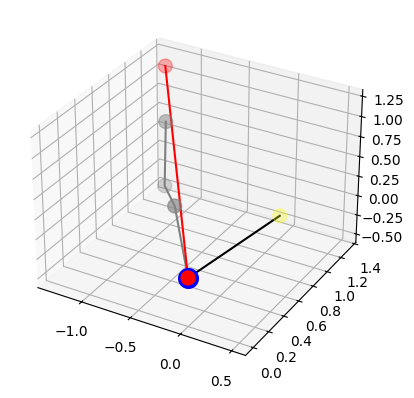

In [ ]:
x_fk = [0,joint_0_fk[0,3],joint_1_fk[0,3],joint_2_fk[0,3]]
y_fk = [0,joint_0_fk[1,3],joint_1_fk[1,3],joint_2_fk[1,3]]
z_fk = [0,joint_0_fk[2,3],joint_1_fk[2,3],joint_2_fk[2,3]]



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_fk, y_fk, z_fk, c='grey', s=100)
ax.plot(x_fk, y_fk, z_fk, color='grey')

ax.scatter(x_targ, y_targ, z_targ, c='yellow', s=100)

ax.plot(x_targ, y_targ, z_targ, color='black')
ax.scatter(x_fk[0], y_fk[0],z_fk[0], c='blue', s=200)

error_x = [x_targ[1],joint_2_fk[0,3]]
error_y = [y_targ[1],joint_2_fk[1,3]]
error_z = [z_targ[1],joint_2_fk[2,3]]

ax.scatter(error_x, error_y, error_y, color='red',s=100)
ax.plot(error_x, error_y, error_y, color='red')

plt.show()

In [587]:
error_x = joint_1_fk[0,1] - x_targ[1]
error_y = joint_1_fk[0,2] - y_targ[1]
error_z = joint_1_fk[0,3] - z_targ[1]

(error_x,error_y,error_z)

(-1.11799003609699, -0.843639804569896, -1.82509681728354)

Attempt 2 isolate ju

In [588]:
fk_mat = h.Rot_z(phi)*h.trans_y(length_a)*h.Rot_x(theta_1)*h.trans_y(length_b)
sp.simplify(fk_mat)

Matrix([
[cos(phi_0), -sin(phi_0)*cos(theta_1),  sin(phi_0)*sin(theta_1), -(l_0-1 + l_1-2*cos(theta_1))*sin(phi_0)],
[sin(phi_0),  cos(phi_0)*cos(theta_1), -sin(theta_1)*cos(phi_0),  (l_0-1 + l_1-2*cos(theta_1))*cos(phi_0)],
[         0,             sin(theta_1),             cos(theta_1),                       l_1-2*sin(theta_1)],
[         0,                        0,                        0,                                        1]])

In [589]:
joint_1_fk = joint_0_fk * h.Rot_x(theta_1)*h.trans_y(length_b)
#joint_2_fk = joint_1_fk * h.Rot_x(length_b)*h.trans_y(length_c)
